# EDA部分

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

dataPath = 'C:/Users/zhang/mine/finTech/2021/data/A'

trainDf = pd.read_csv(dataPath + '/train_v1.csv')
wkdDf = pd.read_csv(dataPath + '/wkd_v1.csv')
testDf = pd.read_csv(dataPath + '/test_v1_periods.csv')
testDayDf = pd.read_csv(dataPath + '/test_v1_day.csv')

wkdDf = wkdDf.rename(columns={'ORIG_DT':'date'})

In [22]:
######### 这里数据官方已清洗过
trainDf = trainDf.merge(wkdDf, on = ['date'], how = 'left')
testDf = testDf.merge(wkdDf, on = ['date'], how = 'left')
testDayDf = testDayDf.merge(wkdDf, on = ['date'], how = 'left')

trainDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695520 entries, 0 to 695519
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        695520 non-null  object
 1   post_id     695520 non-null  object
 2   biz_type    695520 non-null  object
 3   periods     695520 non-null  int64 
 4   amount      695520 non-null  int64 
 5   WKD_TYP_CD  695520 non-null  object
dtypes: int64(2), object(4)
memory usage: 37.1+ MB


In [23]:
trainDf.head()

,date,post_id,biz_type,periods,amount,WKD_TYP_CD
0,2018/1/1,A,A1,1,0,NH
1,2018/1/1,A,A1,2,0,NH
2,2018/1/1,A,A1,3,0,NH
3,2018/1/1,A,A1,4,0,NH
4,2018/1/1,A,A1,5,0,NH


In [24]:
#将A/B岗位拆分出来分别分析，以天为粒度
## 提取岗位以日为粒度的业务量
def get_jobDayAmount(df):
    outputDf = df.groupby(['date', 'post_id', 'WKD_TYP_CD'], as_index = False)['amount'].sum()
    return outputDf

tmp = get_jobDayAmount(trainDf)
train_day_df=pd.DataFrame(tmp).reset_index()
train_day_df_A=train_day_df[train_day_df['post_id']=='A'].reset_index(drop=True)
train_day_df_B=train_day_df[train_day_df['post_id']=='B'].reset_index(drop=True)
#train_day_df_A=train_day_df_A.merge(wkd_df)
#train_day_df_B=train_day_df_B.merge(wkd_df)
#
def get_frt(df):
    df['WKD_TYP_CD']=df['WKD_TYP_CD'].map({'WN':0,'SN': 1, 'NH': 1, 'SS': 1, 'WS': 0})
    df['date'] = pd.to_datetime(df['date'], format = '%Y/%m/%d')
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df.drop(['date','post_id'],axis=1,inplace=True)
    return df
train_day_df_A=get_frt(train_day_df_A)
train_day_df_B=get_frt(train_day_df_B)

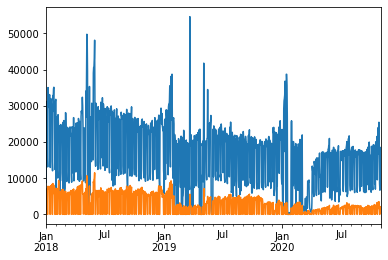

In [25]:
ts = pd.Series(train_day_df_A['amount'].values, index=pd.date_range("1/1/2018", periods=len(train_day_df_A['amount'].values)))
ts.plot()
ts = pd.Series(train_day_df_B['amount'].values, index=pd.date_range("1/1/2018", periods=len(train_day_df_B['amount'].values)))
ts.plot()

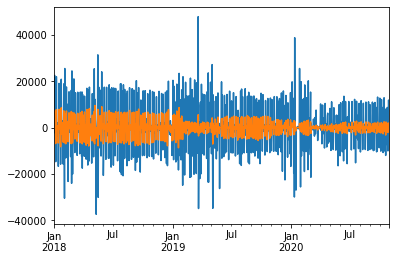

In [26]:
ts = pd.Series(train_day_df_A['amount'].values, index=pd.date_range("1/1/2018", periods=len(train_day_df_A['amount'].values)))
ts = ts.diff(1)
ts.plot()
ts = pd.Series(train_day_df_B['amount'].values, index=pd.date_range("1/1/2018", periods=len(train_day_df_B['amount'].values)))
ts = ts.diff(1)
ts.plot()


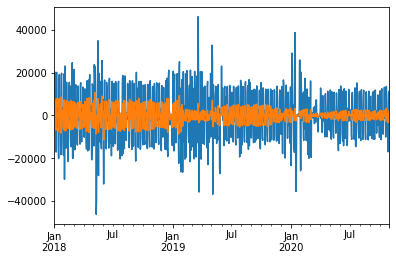

In [27]:
ts = pd.Series(train_day_df_A['amount'].values, index=pd.date_range("1/1/2018", periods=len(train_day_df_A['amount'].values)))
ts = ts.diff(2)
ts.plot()
ts = pd.Series(train_day_df_B['amount'].values, index=pd.date_range("1/1/2018", periods=len(train_day_df_B['amount'].values)))
ts = ts.diff(2)
ts.plot()


In [15]:
train_day_df_B.shape

(1035, 6)

# 查看自相关及偏相关图

In [16]:
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## A

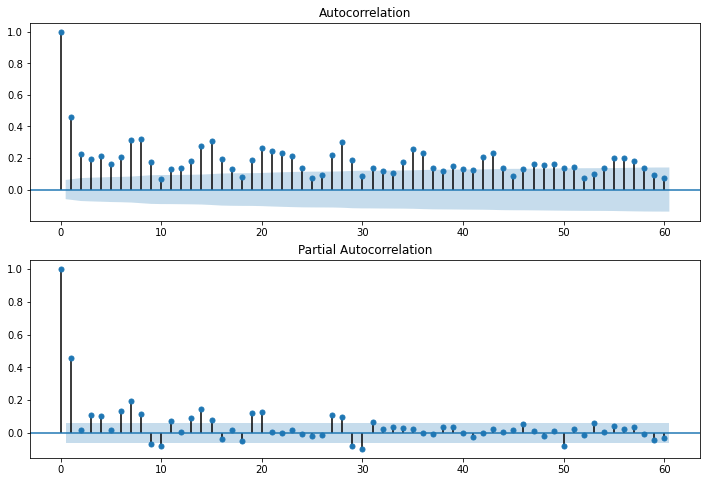

In [38]:
ts = pd.Series(train_day_df_A['amount'].values, index=pd.date_range("1/1/2018", periods=len(train_day_df_A['amount'].values)))
#ts = ts.diff(1)#我们已经知道要使用一阶差分的时间序列，之前判断差分的程序可以注释掉
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts,lags=60,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts,lags=60,ax=ax2)


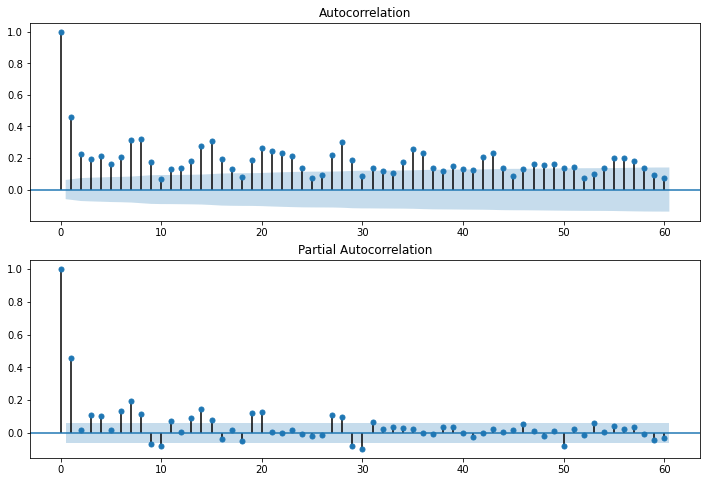

In [66]:
ts = pd.Series((train_day_df_A['amount']/1e4).values, index=pd.date_range("1/1/2018", periods=len(train_day_df_A['amount'].values)))
#ts = ts.diff(1)#我们已经知道要使用一阶差分的时间序列，之前判断差分的程序可以注释掉
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts,lags=60,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts,lags=60,ax=ax2)


## B

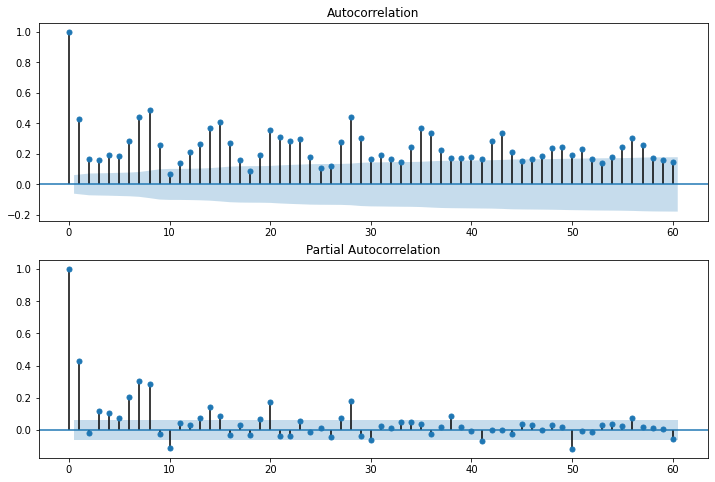

In [39]:
ts = pd.Series(train_day_df_B['amount'].values, index=pd.date_range("1/1/2018", periods=len(train_day_df_A['amount'].values)))
#ts = ts.diff(3)#我们已经知道要使用一阶差分的时间序列，之前判断差分的程序可以注释掉
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts,lags=60,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts,lags=60,ax=ax2)


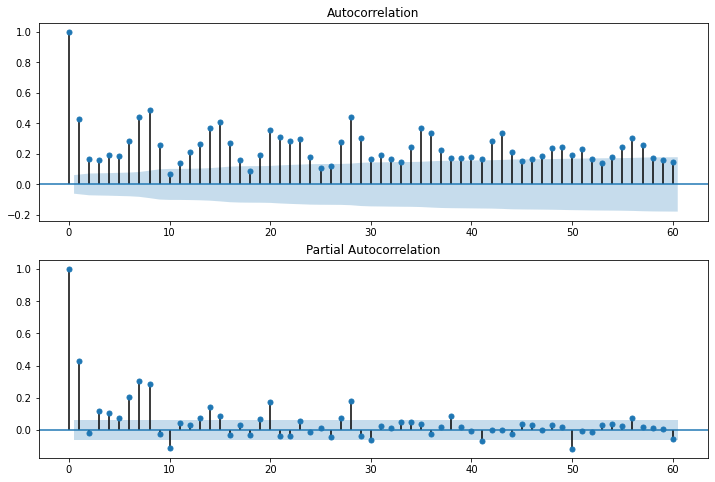

In [67]:
ts = pd.Series((train_day_df_B['amount']/1e4).values, index=pd.date_range("1/1/2018", periods=len(train_day_df_A['amount'].values)))
#ts = ts.diff(3)#我们已经知道要使用一阶差分的时间序列，之前判断差分的程序可以注释掉
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts,lags=60,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts,lags=60,ax=ax2)


# A 分析

查看几个滞后阶效果，ARMA(20,0)最好

In [41]:
dta = pd.Series(train_day_df_A['amount'].values, index=pd.date_range("1/1/2018", periods=len(train_day_df_A['amount'].values)))

arma_mod20 = sm.tsa.ARMA(dta,(20,0)).fit()
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)
arma_mod30 = sm.tsa.ARMA(dta,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod40 = sm.tsa.ARMA(dta,(20,1)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic)

21400.606740752035 21509.334188277422 21441.861690345097
21586.898181922905 21601.724652040004 21592.523856867414
21402.57095167257 21516.240555903656 21445.701126247135


In [42]:
arma_mod7 = sm.tsa.ARMA(dta,(7,0)).fit()
print(arma_mod20.aic,arma_mod20.bic,arma_mod7.hqic)

21400.606740752035 21509.334188277422 21496.22864372759


## 看残差自相关图及偏相关图

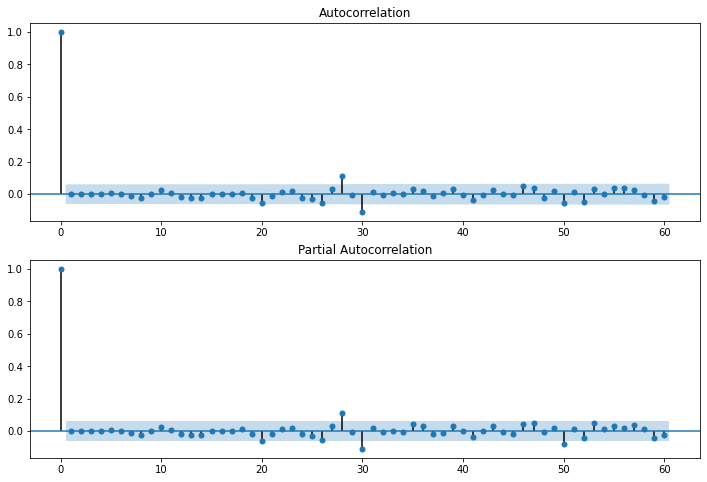

In [46]:
resid = arma_mod20.resid#残差
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=60, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=60, ax=ax2)

## D-W检验
接近2表示无自相关

In [47]:
print(sm.stats.durbin_watson(arma_mod20.resid.values))

1.9986000432126754


## 观察残差是否符合正态分布

In [ ]:
resid = arma_mod20.resid#残差
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

## Ljung-Box检验
查看最后一列前十二行效果，以0.05为显著水平，判断为白噪声模型，arima模型适合

In [48]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC             Q  Prob(>Q)
lag                                   
1.0   0.000005  2.127845e-08  0.999884
2.0  -0.000135  1.887797e-05  0.999991
3.0  -0.001704  3.040187e-03  0.999955
4.0  -0.000401  3.207384e-03  0.999999
5.0   0.007833  6.713854e-02  0.999939
6.0   0.002936  7.613253e-02  0.999991
7.0  -0.013506  2.665914e-01  0.999933
8.0  -0.025869  9.659801e-01  0.998454
9.0   0.001602  9.686653e-01  0.999506
10.0  0.024274  1.585655e+00  0.998643
11.0  0.005200  1.613995e+00  0.999457
12.0 -0.018146  1.959463e+00  0.999465
13.0 -0.025440  2.639134e+00  0.998954
14.0 -0.026110  3.355766e+00  0.998257
15.0  0.003698  3.370155e+00  0.999180
16.0 -0.000315  3.370260e+00  0.999634
17.0  0.001482  3.372576e+00  0.999840
18.0  0.010380  3.486278e+00  0.999914
19.0 -0.020551  3.932419e+00  0.999907
20.0 -0.056500  7.308021e+00  0.995546
21.0 -0.013222  7.493076e+00  0.996947
22.0  0.011689  7.637844e+00  0.997997
23.0  0.017314  7.955762e+00  0.998442
24.0 -0.021685  8.454994e

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


## 预测A业务
2020/11/1 - 2020/11/30

2020-11-01    17816.986157
2020-11-02    18488.887144
2020-11-03    14681.543244
2020-11-04    12632.809368
2020-11-05    16798.280558
2020-11-06    19156.290003
2020-11-07    19788.232792
2020-11-08    18529.331509
2020-11-09    18232.925143
2020-11-10    15943.591895
2020-11-11    15430.445462
2020-11-12    15820.988663
2020-11-13    18257.624582
2020-11-14    19846.701567
2020-11-15    18991.748253
2020-11-16    16267.456299
2020-11-17    15379.716697
2020-11-18    15701.446294
2020-11-19    15968.659283
2020-11-20    17043.633134
2020-11-21    18349.552064
2020-11-22    18849.416396
2020-11-23    17261.005512
2020-11-24    15979.388524
2020-11-25    16004.001382
2020-11-26    16772.091843
2020-11-27    17307.113311
2020-11-28    18202.215960
2020-11-29    18551.709146
2020-11-30    17686.035305
Freq: D, dtype: float64


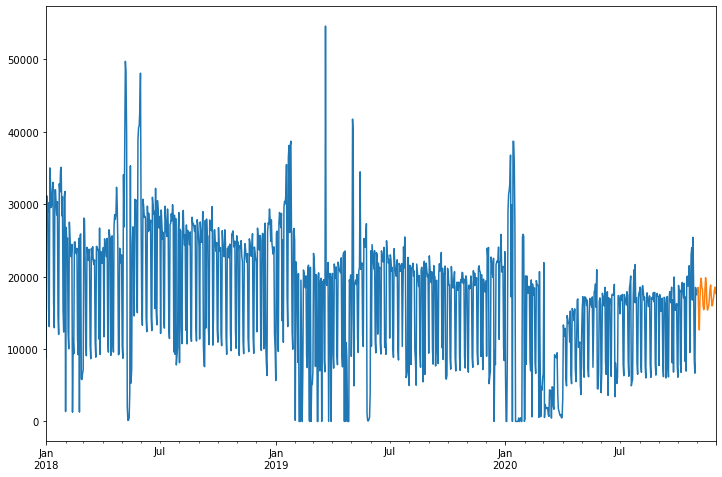

In [53]:
predict_sunspots = arma_mod20.predict('11/1/2020', '11/30/2020', dynamic=True)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.plot(ax=ax)
predict_sunspots.plot(ax=ax)

# B分析


In [61]:
dta = pd.Series(train_day_df_B['amount'].values, index=pd.date_range("1/1/2018", periods=len(train_day_df_B['amount'].values)))

arma_mod28 = sm.tsa.ARMA(dta,(28,0)).fit()
print(arma_mod28.aic,arma_mod20.bic,arma_mod28.hqic)


18694.04165074054 21509.334188277422 18750.298400185624


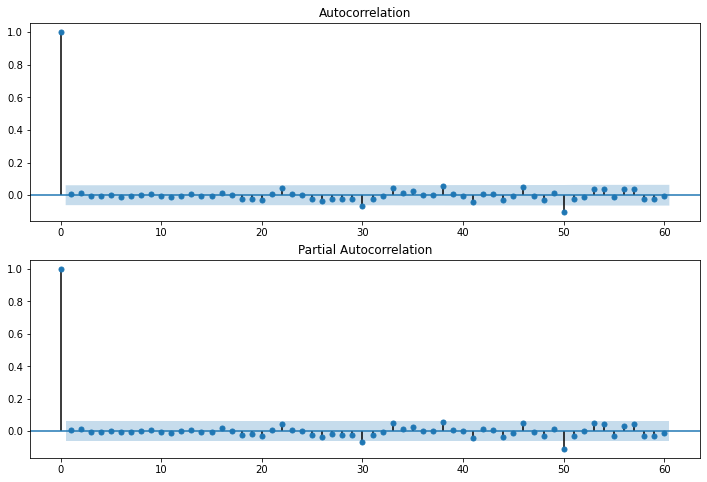

In [62]:
resid = arma_mod28.resid#残差
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=60, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=60, ax=ax2)

In [63]:
print(sm.stats.durbin_watson(arma_mod28.resid.values))

1.9852445124390055


In [64]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.006197   0.039863  0.841749
2.0   0.013283   0.223174  0.894414
3.0  -0.003834   0.238463  0.971153
4.0  -0.003383   0.250379  0.992788
5.0  -0.001339   0.252248  0.998446
6.0  -0.008195   0.322292  0.999382
7.0  -0.004910   0.347458  0.999836
8.0  -0.001433   0.349605  0.999966
9.0   0.008247   0.420751  0.999986
10.0 -0.004426   0.441268  0.999996
11.0 -0.010579   0.558569  0.999998
12.0 -0.002117   0.563271  0.999999
13.0  0.007165   0.617189  1.000000
14.0 -0.004708   0.640486  1.000000
15.0 -0.005007   0.666868  1.000000
16.0  0.015148   0.908555  1.000000
17.0  0.001486   0.910883  1.000000
18.0 -0.022517   1.445973  1.000000
19.0 -0.021474   1.933091  1.000000
20.0 -0.030552   2.920107  0.999997
21.0  0.006597   2.966176  0.999999
22.0  0.042695   4.897502  0.999949
23.0  0.008864   4.980830  0.999973
24.0 -0.000744   4.981417  0.999988
25.0 -0.025058   5.648694  0.999981
26.0 -0.034314   6.901144  0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


2020-11-01    2039.395411
2020-11-02    1999.858962
2020-11-03    1154.386152
2020-11-04     850.819638
2020-11-05    1989.969640
2020-11-06    2220.431809
2020-11-07    2533.364788
2020-11-08    2439.224895
2020-11-09    1828.522847
2020-11-10    1576.428352
2020-11-11    1299.984852
2020-11-12    1630.381752
2020-11-13    2140.429472
2020-11-14    2471.116325
2020-11-15    2608.787085
2020-11-16    1997.590793
2020-11-17    1359.205138
2020-11-18    1736.866846
2020-11-19    2089.394822
2020-11-20    2215.459879
2020-11-21    2294.297347
2020-11-22    2766.233923
2020-11-23    2297.544341
2020-11-24    1361.216088
2020-11-25    1357.564717
2020-11-26    1892.411617
2020-11-27    2132.376223
2020-11-28    2281.492005
2020-11-29    2351.152843
2020-11-30    2339.545109
Freq: D, dtype: float64


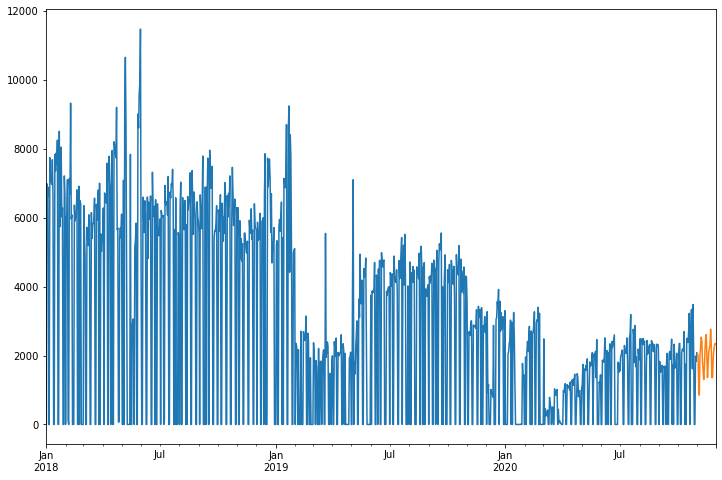

In [65]:
predict_sunspots = arma_mod28.predict('11/1/2020', '11/30/2020', dynamic=True)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.plot(ax=ax)
predict_sunspots.plot(ax=ax)